In [2]:
#%matlplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

from pandas.tools.plotting import scatter_matrix

df = pd.read_csv('/home/sush/Desktop/Datathon1.csv')

print(df.describe())



       graduationyear            q1            q2            q3            q4  \
count    95748.000000  95753.000000  95753.000000  95753.000000  95753.000000   
mean      2017.865877     17.304826     14.047811     11.544688     20.863221   
std          3.235229     38.855384     35.902204     32.078696     40.883189   
min       1950.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       2018.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       2018.000000     -1.000000     -1.000000     -1.000000     -1.000000   
75%       2019.000000     -1.000000     -1.000000     -1.000000     -1.000000   
max       2023.000000    100.000000    100.000000    100.000000    100.000000   

                 q5            q6            q7            q8  
count  95753.000000  95753.000000  95753.000000  95753.000000  
mean      12.404358     11.792802      3.592577      3.477917  
std       32.316094     31.597635     20.198839     19.968333  
min       -1.0

In [3]:
print(df.info())

df = df.dropna()
print(df.isnull().any())
df.to_csv('Cleaned1.csv')
#removing null values 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95753 entries, 0 to 95752
Data columns (total 11 columns):
profession            95744 non-null object
graduationyear        95748 non-null float64
state_of_residence    95587 non-null object
q1                    95753 non-null int64
q2                    95753 non-null int64
q3                    95753 non-null float64
q4                    95753 non-null float64
q5                    95753 non-null float64
q6                    95753 non-null float64
q7                    95753 non-null int64
q8                    95753 non-null int64
dtypes: float64(5), int64(4), object(2)
memory usage: 8.0+ MB
None
profession            False
graduationyear        False
state_of_residence    False
q1                    False
q2                    False
q3                    False
q4                    False
q5                    False
q6                    False
q7                    False
q8                    False
dtype: bool


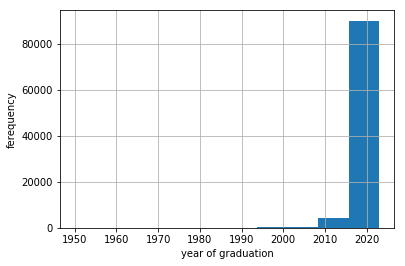

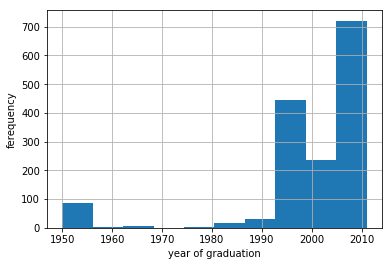

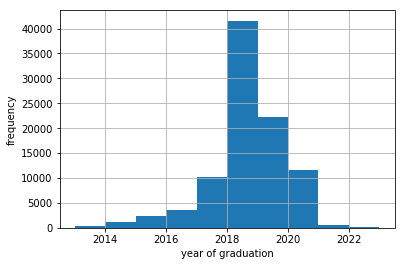

In [4]:
df['graduationyear'].hist()
plt.xlabel('year of graduation')
plt.ylabel('ferequency')
plt.show()

df[df.graduationyear<2012]['graduationyear'].hist()
plt.xlabel('year of graduation')
plt.ylabel('ferequency')
plt.show()

df[df.graduationyear>2012]['graduationyear'].hist()
plt.xlabel('year of graduation')
plt.ylabel('frequency')
plt.show()

#CONCLUSION:Most of the people who took the test are young people
#Among the young people, students were the greatest participators in this exam
#However, there were some veterans indicated by the histogram(plotted between years 1950 and 2010)

#The graph is left-skewed because there are people who arent student who took the test

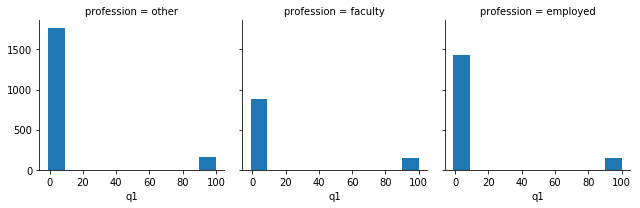

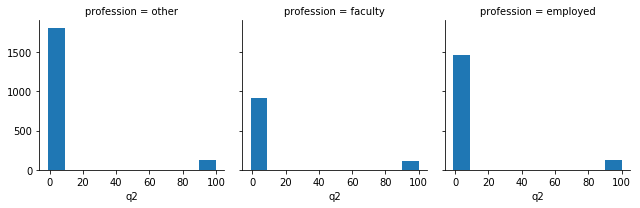

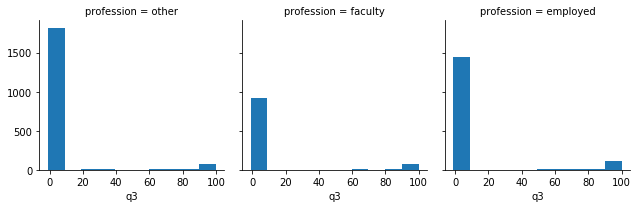

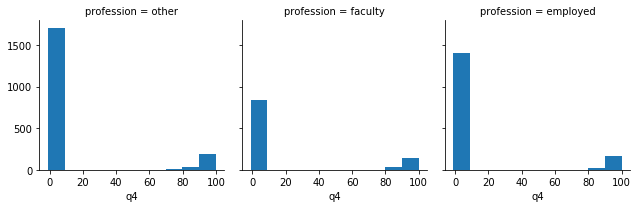

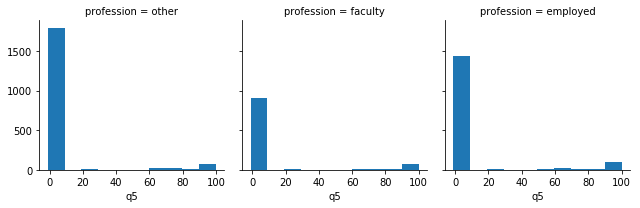

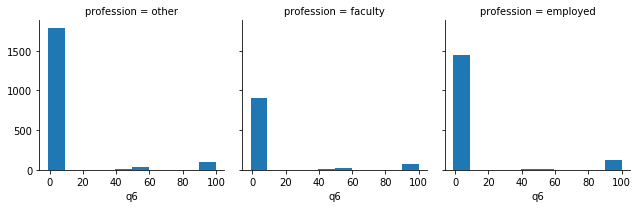

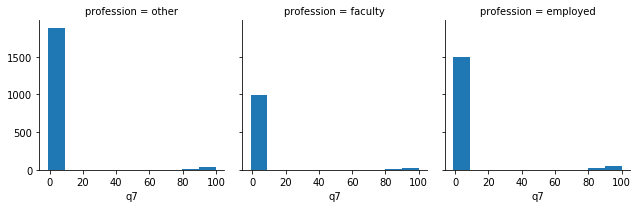

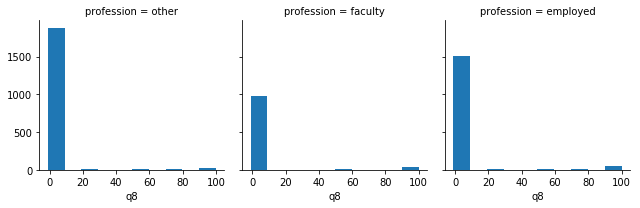

In [5]:
grid = sns.FacetGrid(df[df.profession != 'student'],col='profession')
grid.map(plt.hist, 'q1')
plt.show()
grid = sns.FacetGrid(df[df.profession != 'student'],col='profession')
grid.map(plt.hist, 'q2')
plt.show()
grid = sns.FacetGrid(df[df.profession != 'student'],col='profession')
grid.map(plt.hist, 'q3')
plt.show()
grid = sns.FacetGrid(df[df.profession != 'student'],col='profession')
grid.map(plt.hist, 'q4')
plt.show()
grid = sns.FacetGrid(df[df.profession != 'student'],col='profession')
grid.map(plt.hist, 'q5')
plt.show()
grid = sns.FacetGrid(df[df.profession != 'student'],col='profession')
grid.map(plt.hist, 'q6')
plt.show()
grid = sns.FacetGrid(df[df.profession != 'student'],col='profession')
grid.map(plt.hist, 'q7')
plt.show()
grid = sns.FacetGrid(df[df.profession != 'student'],col='profession')
grid.map(plt.hist, 'q8')
plt.show()

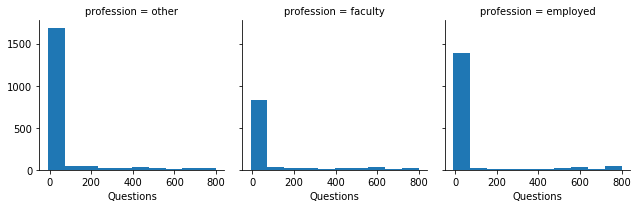

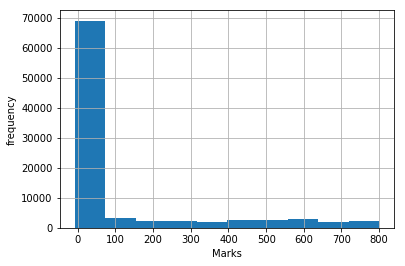

In [6]:
Total = df.q1 + df.q2 + df.q3 + df.q4 + df.q5 + df.q6 + df.q7 +df.q8 
df = df.assign(Questions = Total)

grid = sns.FacetGrid(df[df.profession != 'student'],col='profession')
grid.map(plt.hist, 'Questions')
plt.show()

df[df.profession == 'student'].Questions.hist()
plt.xlabel('Marks')
plt.ylabel('frequency')
plt.show()

#CONCLUSION:
#The Faculty members were those that performed relatively better compared to 'other' and 'employed' people, but performed  
#worse than students

      profession  graduationyear state_of_residence   q1   q2     q3     q4  \
82       student          2018.0        West_Bengal  100  100  100.0  100.0   
90327    student          2017.0              Bihar  100  100  100.0  100.0   
90328    student          2018.0          Karnataka  100  100  100.0  100.0   
90329    student          2019.0          Karnataka  100  100  100.0  100.0   
90330    student          2018.0         Tamil_Nadu  100  100  100.0  100.0   
90331    student          2018.0        West_Bengal  100  100  100.0  100.0   
90332    student          2019.0     Madhya_Pradesh  100  100  100.0  100.0   
90333    student          2018.0          Telangana  100  100  100.0  100.0   
90334    student          2018.0         Tamil_Nadu  100  100  100.0  100.0   
90335    student          2020.0      Uttar_Pradesh  100  100  100.0  100.0   
90336    student          2018.0     Madhya_Pradesh  100  100  100.0  100.0   
90337    student          2016.0        Maharashtra 

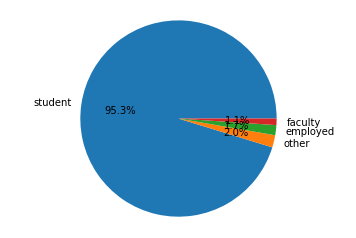

In [7]:
print(df[df.Questions == 800])

x = df.profession.value_counts()
plt.pie(x.get_values(), labels = x.index, autopct='%1.1f%%')
plt.axis("equal")
plt.show()


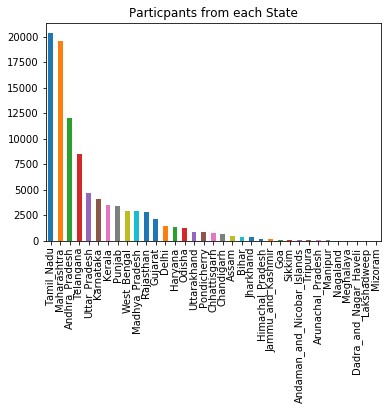

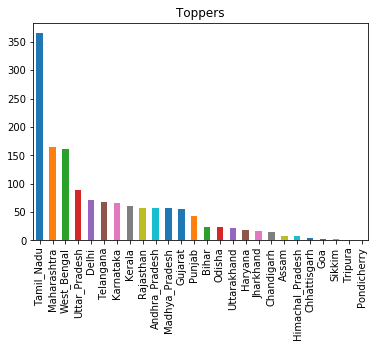

In [8]:

df['state_of_residence'].value_counts().plot(kind='bar')
plt.title('Particpants from each State')
plt.show()

df[df.Questions==800]['state_of_residence'].value_counts().plot(kind='bar')
plt.title('Toppers')
plt.show()
#CONCLUSION:The toppers are mostly from Tamil Nadu(Tamil Nadu also has the most number of particpants) as shown by the 
##barplots

In [9]:
#df[df.profession == 800]['state_of_residence'].value_counts().plot(kind='bar')
#plt.show()
means = []
x=np.mean(df[df.profession == 'student'].Questions)
means.append(x)

y=np.mean(df[df.profession == 'other'].Questions)
means.append(y)

w=np.mean(df[df.profession == 'faculty'].Questions)
means.append(w)

z=np.mean(df[df.profession == 'employed'].Questions)
means.append(z)

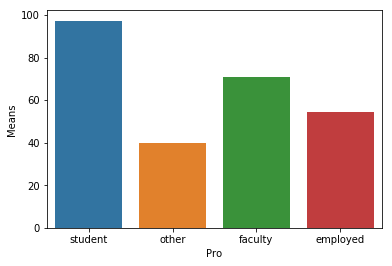

In [10]:
new_df = pd.DataFrame()
pro=['student','other','faculty','employed']
new_df = new_df.assign(Pro = pro)
new_df = new_df.assign(Means=means)
sns.barplot(data=new_df,x='Pro',y='Means')
plt.show()

#CONCLUSION: Students perform better than faculty,who perform better than the remaining two professions as shown by the 
##bar plot between profession and mean scores obtained by them

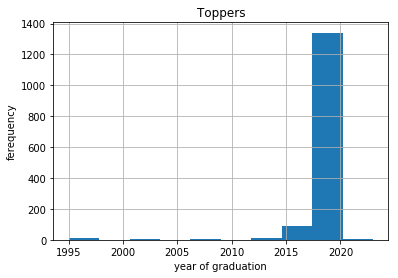

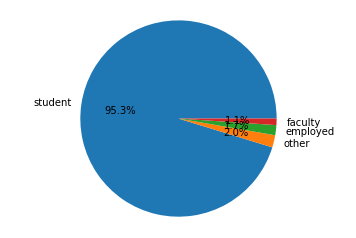

In [11]:
df[df.Questions == 800].graduationyear.hist()
plt.title('Toppers')
plt.xlabel('year of graduation')
plt.ylabel('ferequency')
plt.show()

x = df.profession.value_counts()

plt.pie(x.get_values(), labels = x.index, autopct='%1.1f%%')
plt.axis("equal")
plt.show()

#CONCLUSION:Most of the toppers were students as indicated by the pie chart and the histogram(year of graduation~2020)

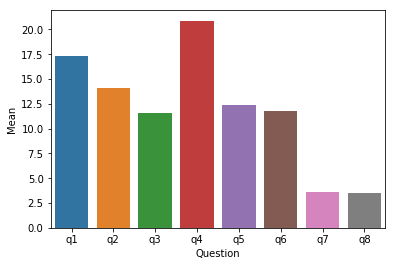

In [12]:
diff=pd.DataFrame()
m1=np.mean(df.q1)
m2=np.mean(df.q2)
m3=np.mean(df.q3)
m4=np.mean(df.q4)
m5=np.mean(df.q5)
m6=np.mean(df.q6)
m7=np.mean(df.q7)
m8=np.mean(df.q8)
m=[]
m.append(m1)
m.append(m2)
m.append(m3)
m.append(m4)
m.append(m5)
m.append(m6)
m.append(m7)
m.append(m8)
diff=diff.assign(Mean=m)

q=['q1','q2','q3','q4','q5','q6','q7','q8']
diff=diff.assign(Question=q)
sns.barplot(x='Question', y='Mean',data=diff)
plt.show()

#CONCLUSION:Questions 4 and 1 were the easiest, while questions 7 and 8 were the hardest as shown by the barplot between
##questions and the mean marks for that question

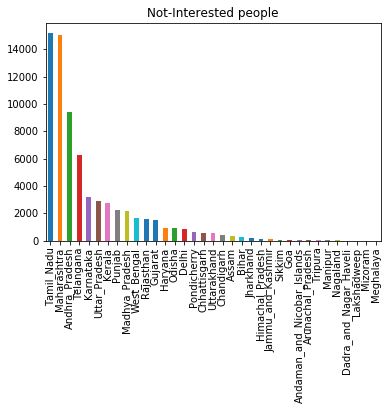

In [13]:
interested = []
for index,row in df.Questions.iteritems():
    if(row == -8):
        interested.append('no')
    else:
        interested.append('yes')
df = df.assign(Interested=interested)


df[df.Interested=='no']['state_of_residence'].value_counts().plot(kind='bar')
plt.title('Not-Interested people')
plt.show()

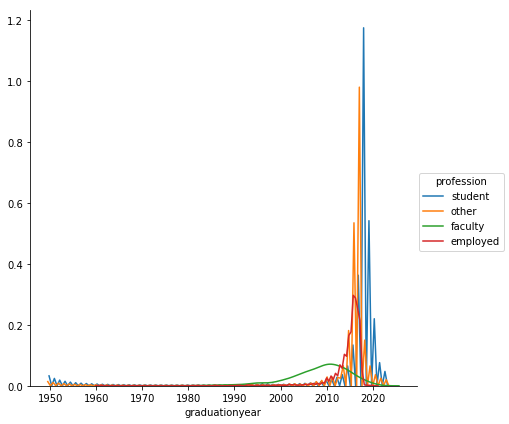

In [14]:
sns.FacetGrid(df, hue="profession", size=6) \
 .map(sns.kdeplot, "graduationyear") \
 .add_legend()
plt.show()

#CONCLUSION : The following distribution shows that the 'other' people weren't very old, they were almost of the same age 
#as the employed people
#The faculty were the oldest of the people who took the test.